In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display

# for network plots:
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx
import re # for string split based on multiple characters

This file contains the final code. 

More explanation about the intermediate steps of the data cleaning can be found in the file FINAL_network of infections data_inlezen combineren afbeelden.

# Run from here:

1. Depending on the laptop, select the right line of code:
2. The network folders that end with 'infection networks' are complete and read in. The incomplete folders end with 'infection' and are therefore not read.
3. The list of correct folders is printed as result.

In [5]:
# os.chdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\Test runs')
os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)')

In [6]:
folders = []
# for x in os.listdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\Test runs'):
for x in os.listdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)'):
    if x.endswith("infection networks"):
        folders.append(x)
print(len(folders))
folders

14


['01. Mobility policies - infection networks',
 '02. Compliance 90% - infection networks',
 '03. Queue-distance 1.5m - infection networks',
 '04. Queue-distance 0.5m - infection networks',
 '05. Plot-size 25m - infection networks',
 '06. Factor-asymptomatic 2 - infection networks',
 '07. Mask-effect 50% - infection networks',
 '08. Compliance 80% - infection networks',
 '09. 20% elderly - mobility policies - infection networks',
 '10. 20% elderly - 1.5m queuedistance - infection networks',
 '12. Start with 2 infections - infection networks',
 '13. Food distribution at day 8 - infection networks',
 '14. Transmission probability 10% - infection networks',
 '15. Household-size 7 - infection networks']

# Official start:

In [9]:


for folder in folders:
    os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)\\' + folder) # fill in directory with folders that contain the infection data
#     os.chdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\' + folder)
    for file in os.listdir():
        data = pd.DataFrame()
        data = pd.read_csv(file, sep = ']', header = None)
        data = data.T
        variables = re.split(' "|" | ', data.iloc[-1][0])
        variables = variables[1:3]
#         data['variables'] = " ".join(str(x) for x in result)
        
#         data['variables'] = str(data.iloc[-1][0]).split("'")[0].split()[0]
data

# axes[i].set_title('Mobility = {} (1 run)'.format(k))

0
0      [[8596 "elderly" (tent 323) "pre-symptomatic"...
1      [8590 "adult" (tent 323) "pre-symptomatic" "a...
2      [8605 "adult" (tent 323) "pre-symptomatic" "a...
3      [10310 "adult" (tent 323) "pre-symptomatic" "...
4      [14417 "adult" (tent 10310) "pre-symptomatic"...
...                                                 ...
1676   [83686 "child" (tent 82163) "asymptomatic" "a...
1677   [83687 "child" (tent 81341) "asymptomatic" "a...
1678   [83689 "child" (tent 82285) "asymptomatic" "c...
1679                                                NaN
1680                          "quarantined" 7 36285.498

[1681 rows x 1 columns]

In [10]:
# data['variables'] = str(data.iloc[-1][0]).split("'")[0].split()[0]
result = re.split(' "|" | ', data.iloc[-1][0])
result = result[1:3]
result
" ".join(str(x) for x in result)
len(variables[1])

1

In [12]:
bigdata = pd.DataFrame()
experimentNo = 0
runNo = 0
for folder in folders:
    os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)\\' + folder)
    runNo = 0
    experimentNo = experimentNo + 1
    
    for x in os.listdir():
        runNo = runNo + 1
        data = pd.DataFrame()
        data = pd.read_csv(x, sep = ']', header = None)
        data = data.T
        data.columns = ['string']
        data = data.replace({'\[':''}, regex = True)
        # store the value of the last row with the variables in a column 'variables', before deleting them
        variables = re.split(' "|" | ', data.iloc[-1][0])
        if len(variables[2]) > 5:
            variables = variables[1]
        elif len(variables[2]) <= 5:
            variables = variables[1:3]
        data['variables'] = " ".join(str(x) for x in variables)
        data = data.iloc[:-2]
        data.head()
        
        #Het volgende stukje was gemaakt toen de variabelen nog vooraan opgeslagen waren:
#         if data.iloc[0,0].split(' ')[2].isnumeric(): # Some variable settings also contain letters or signs.
#             variable_setting = data.iloc[0,0].split(' ')[1]
#             variable_setting
#             data.iloc[0,0] = data.iloc[0,0].replace(variable_setting, "")
#             data.iloc[0,0] = data.iloc[0,0][1:]   # remove a redundant space
#         else:
#             variable_setting = data.iloc[0,0].split('"')[1]
#             data.iloc[0,0] = data.iloc[0,0].replace(variable_setting, "")
#             data.iloc[0,0] = data.iloc[0,0][3:]  # remove a redundant " and space

        data['who'] = data['string'].str.split(' ').str[1]
        data['age'] = data['string'].str.split('"').str[1]
        data['infected by'] = data['string'].str.split('\(').str[1]
        data['infected by'] = data['infected by'].str.split(')').str[0]
        data['infected by'] = data['infected by'].str.split(' ').str[1]
        data['infectors-status'] = data['string'].str.split('"').str[3]
        data['infectors-age'] = data['string'].str.split('"').str[5]
        data['heading'] = data['string'].str.split('\(').str[2]
        if data['heading'].notnull().any() == True:
#             print('There are people infected ou of home:')
            data['heading'] = data['heading'].str.split(')').str[0]
            data['heading'].replace(np.nan, 'none', inplace = True)
        else:
            print('All people are infected at home:')
            data['heading'].replace(np.nan, 'none', inplace = True)
#         data['heading'] = data['heading'].str.split(')').str[0]
#         data['heading'].replace(np.nan, 'none', inplace = True)
        data['queue-time'] = data['string'].str.slice(-1)
        data.drop(['string'], axis = 1, inplace = True)
        data['experimentNo'] = experimentNo
        data['runNo'] = runNo

        # Add columns with the number of people one infector infected and
        # how many people were infected at a certain location 
        data['count-infector'] = data.groupby('infected by')['infected by'].transform('count')
        data['count-infect-location'] = data.groupby('heading')['heading'].transform('count')
    
        bigdata = bigdata.append(data, ignore_index = True)
        print('I finished file ' + x)
    print('I finished folder ' + folder)

I finished file output-mobility_free_timer_34895.335
I finished file output-mobility_free_timer_8239.821
I finished file output-mobility_free_timer_8443.664
I finished file output-mobility_free_timer_8746.595
I finished file output-mobility_free_timer_8897.981
I finished file output-mobility_isolation_timer_10332.857
I finished file output-mobility_isolation_timer_10593.079
I finished file output-mobility_isolation_timer_11359.026
I finished file output-mobility_isolation_timer_12225.343
I finished file output-mobility_isolation_timer_36786.123
All people are infected at home:
I finished file output-mobility_isolation_timer_9596.073
I finished file output-mobility_no-elderly_timer_17177.479
I finished file output-mobility_no-elderly_timer_19425.14
I finished file output-mobility_no-elderly_timer_19518.813
I finished file output-mobility_no-elderly_timer_19729.895
I finished file output-mobility_no-elderly_timer_20811.67
I finished file output-mobility_no-elderly_timer_45230.437
All peo

All people are infected at home:
I finished file output-mobility_isolation_plotsize-shelters_25 m2_timer_6591.527
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_20520.063
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22130.14
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22432.79
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22715.648
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22839.536
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_23335.381
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_21675.042
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_21986.295
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_33002.893
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_41742.902
I finished file output-mobility_quarantined_plotsize-s

I finished file output-mobility_quarantined_timer_28841.609
I finished file output-mobility_quarantined_timer_29141.658
I finished file output-mobility_quarantined_timer_29602.457
I finished file output-mobility_quarantined_timer_30560.383
I finished folder 09. 20% elderly - mobility policies - infection networks
I finished file output-mobility_free_queue-distance_1.5_timer_10962.216
I finished file output-mobility_free_queue-distance_1.5_timer_11376.893
I finished file output-mobility_free_queue-distance_1.5_timer_12843.354
I finished file output-mobility_free_queue-distance_1.5_timer_12964.391
I finished file output-mobility_free_queue-distance_1.5_timer_13450.911
I finished file output-mobility_free_queue-distance_1.5_timer_44849.959
All people are infected at home:
I finished file output-mobility_isolation_queue-distance_1.5_timer_10448.137
I finished file output-mobility_isolation_queue-distance_1.5_timer_10736.77
I finished file output-mobility_isolation_queue-distance_1.5_timer_

In [13]:
print(bigdata['runNo'].unique())
print(bigdata['experimentNo'].unique())
print(bigdata['variables'].unique())
bigdata.head()


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 1  2  3  4  5  6  7  8  9 10 11 12 14]
['f r e e' 'i s o l a t i o n' 'n o - e l d e r l y' 'no-elderly 19425'
 'q u a r a n t i n e d' 'free 90' 'isolation 90' 'no-elderly 90'
 'quarantined 90' 'free 1.5' 'isolation 1.5' 'no-elderly 1.5'
 'quarantined 1.5' 'free 0.5' 'isolation 0.5' 'no-elderly 0.5'
 'quarantined 0.5' 'free "25' 'isolation "25' 'no-elderly "25'
 'quarantined "25' 'free 2' 'isolation 2' 'no-elderly 2' 'quarantined 2'
 'free 50' 'isolation 50' 'no-elderly 50' 'quarantined 50' 'free 80'
 'isolation 80' 'no-elderly 80' 'quarantined 80' 'free 7' 'isolation 7'
 'no-elderly 7' 'quarantined 7']


variables    who    age infected by infectors-status infectors-age  \
0   f r e e   6366  adult         303  pre-symptomatic         child   
1   f r e e   6365  adult         303  pre-symptomatic         child   
2   f r e e  14817  child        6365     asymptomatic         adult   
3   f r e e  16822  child        6365     asymptomatic         adult   
4   f r e e  23576  adult       14817  pre-symptomatic         child   

         heading queue-time  experimentNo  runNo  count-infector  \
0           none          0             1      1             2.0   
1           none          0             1      1             2.0   
2   waterpoint 8          1             1      1             2.0   
3  waterpoint 13          1             1      1             2.0   
4           none          0             1      1             4.0   

   count-infect-location  
0                    371  
1                    371  
2                     64  
3                     39  
4                    371

In [14]:
bigdata.set_index(['experimentNo','variables','runNo']) # nog niet inplace = True gedaan

who    age infected by infectors-status  \
experimentNo variables     runNo                                              
1            f r e e       1       6366  adult         303  pre-symptomatic   
                           1       6365  adult         303  pre-symptomatic   
                           1      14817  child        6365     asymptomatic   
                           1      16822  child        6365     asymptomatic   
                           1      23576  adult       14817  pre-symptomatic   
...                                 ...    ...         ...              ...   
14           quarantined 7 24     83683  child       83213     asymptomatic   
                           24     83685  child       82145     asymptomatic   
                           24     83686  child       82163     asymptomatic   
                           24     83687  child       81341     asymptomatic   
                           24     83689  child       82285     asymptomatic   

                                 infectors-age        heading queue-time  \
experimentNo variables     runNo                                           
1            f r e e       1             child           none          0   
                           1             child           none          0   
                           1             adult   waterpoint 8          1   
                           1             adult  waterpoint 13          1   
                           1             child           none          0   
...                                        ...            ...        ...   
14           quarantined 7 24            child     latrine 69          1   
                           24            child  waterpoint 10          1   
                           24            adult     latrine 51          1   
                           24            adult     latrine 66          1   
                           24            child     latrine 34          1   

                                  count-infector  count-infect-location  
experimentNo variables     runNo                                         
1            f r e e       1                 2.0                    371  
                           1                 2.0                    371  
                           1                 2.0                     64  
                           1                 2.0                     39  
                           1                 4.0                    371  
...                                          ...                    ...  
14           quarantined 7 24                1.0                     11  
                           24                1.0                     27  
                           24                1.0                      6  
                           24                1.0                     10  
                           24                1.0                     11  

[297798 rows x 9 columns]

### Calculate R0:

- for every run
- for every experiment

In [15]:
bigdata.pivot_table(values = ['count-infector','count-infect-location'], index = ['experimentNo','runNo','variables'], aggfunc = 'mean')

# trydf.pivot_table(values = ['who', 'age', 'infected by', 'infectors-status', 'infectors-age',
#        'heading', 'queue-time'], index = ['experimentNo', 'runNo'])

count-infect-location  count-infector
experimentNo runNo variables                                           
1            1     f r e e                   131.421757        3.758159
             2     f r e e                   123.010025        3.214047
             3     f r e e                   120.730866        3.376054
             4     f r e e                   125.929766        3.505017
             5     f r e e                   121.219430        4.058725
...                                                 ...             ...
14           20    quarantined 7             182.583085        3.764916
             21    quarantined 7             177.040500        3.573302
             22    quarantined 7             193.658725        3.417910
             23    quarantined 7             180.665277        4.068575
             24    quarantined 7             186.577129        3.915375

[311 rows x 2 columns]

The above dataframe shows the average R0 over the entire run.

In [16]:
pivot1 = bigdata.pivot_table(values = ['count-infector','count-infect-location'], index = ['experimentNo','runNo','variables'], aggfunc = 'mean')
pivot1
averageR = pivot1.pivot_table(values = 'count-infector', index = 'variables', aggfunc = 'mean')
averageR
averageR.reset_index().rename(columns = {'count-infector':"average R0"})#, 'variables':'mobility'})

variables  average R0
0                 f r e e    3.503267
1                free "25    3.248168
2                free 0.5    3.936491
3                free 1.5    3.466146
4                  free 2    3.674418
5                 free 50    3.343562
6                  free 7    3.762686
7                 free 80    3.557667
8                 free 90    3.629876
9       i s o l a t i o n    2.879449
10          isolation "25    2.125226
11          isolation 0.5    3.117197
12          isolation 1.5    3.066436
13            isolation 2    1.625000
14           isolation 50    2.598511
15            isolation 7    3.249706
16           isolation 80    3.481585
17           isolation 90    3.230559
18    n o - e l d e r l y    3.658769
19         no-elderly "25    3.354920
20         no-elderly 0.5    4.250512
21         no-elderly 1.5    3.365385
22       no-elderly 19425    3.666110
23           no-elderly 2    4.080539
24          no-elderly 50    3.261264
25           no-elderly 7    3.849532
26          no-elderly 80    3.961793
27          no-elderly 90    3.901482
28  q u a r a n t i n e d    3.414146
29        quarantined "25    3.129206
30        quarantined 0.5    4.003895
31        quarantined 1.5    3.084975
32          quarantined 2    2.468354
33         quarantined 50    3.307370
34          quarantined 7    3.698590
35         quarantined 80    3.391687
36         quarantined 90    2.709988

### Determining most risky locations:
Where do most people get infected?
- Can differ per mobility
- Can differ per run


In [17]:
#Starting from bigdata:
bigdata.head()

variables    who    age infected by infectors-status infectors-age  \
0   f r e e   6366  adult         303  pre-symptomatic         child   
1   f r e e   6365  adult         303  pre-symptomatic         child   
2   f r e e  14817  child        6365     asymptomatic         adult   
3   f r e e  16822  child        6365     asymptomatic         adult   
4   f r e e  23576  adult       14817  pre-symptomatic         child   

         heading queue-time  experimentNo  runNo  count-infector  \
0           none          0             1      1             2.0   
1           none          0             1      1             2.0   
2   waterpoint 8          1             1      1             2.0   
3  waterpoint 13          1             1      1             2.0   
4           none          0             1      1             4.0   

   count-infect-location  
0                    371  
1                    371  
2                     64  
3                     39  
4                    371

In [18]:
bigdata.columns

Index(['variables', 'who', 'age', 'infected by', 'infectors-status',
       'infectors-age', 'heading', 'queue-time', 'experimentNo', 'runNo',
       'count-infector', 'count-infect-location'],
      dtype='object')

The following gives a dataframe that sorts the infection locations for every experimentfolder, variable setting and run from high to low:

In [19]:
locationsdf = bigdata.groupby(['experimentNo','variables','runNo','count-infect-location'])['heading'].max().reset_index().sort_values(['experimentNo','runNo','count-infect-location'], ascending = False)

# locationsdf.sort_values('runNo')
locationsdf


experimentNo      variables  runNo  count-infect-location        heading
5545            14  quarantined 7     24                    532           none
5544            14  quarantined 7     24                     81   waterpoint 8
5543            14  quarantined 7     24                     62  waterpoint 14
5542            14  quarantined 7     24                     49  waterpoint 15
5541            14  quarantined 7     24                     44  waterpoint 11
...            ...            ...    ...                    ...            ...
4                1        f r e e      1                      8     latrine 59
3                1        f r e e      1                      7     latrine 60
2                1        f r e e      1                      6     latrine 52
1                1        f r e e      1                      5     latrine 56
0                1        f r e e      1                      4     latrine 49

[5546 rows x 5 columns]

To obtain the highest (or highest x) infection location(s), the dataframe can be adjusted:

In [20]:
locationsdf2 = bigdata.groupby(['experimentNo','variables','runNo','count-infect-location'])['heading'].max()
locationsdf2 = pd.DataFrame(locationsdf2)#.nlargest(5, 'count-infect-location')
# locationsdf2.reset_index(inplace = True)
locationsdf2

heading
experimentNo variables     runNo count-infect-location               
1            f r e e       1     4                         latrine 49
                                 5                         latrine 56
                                 6                         latrine 52
                                 7                         latrine 60
                                 8                         latrine 59
...                                                               ...
14           quarantined 7 24    44                     waterpoint 11
                                 49                     waterpoint 15
                                 62                     waterpoint 14
                                 81                      waterpoint 8
                                 532                             none

[5546 rows x 1 columns]

### The table below shows for each experiment (folder = experimentNo), for what settings, how many times someone got infected at a specific location. 

In [21]:
#Verschil met locationsdf2: wat als ik count-infect-location en 'heading' omdraai in de groupby?
locationsdf3 = bigdata.groupby(['experimentNo','variables','runNo','heading'])['count-infect-location'].max()
locationsdf3 = pd.DataFrame(locationsdf3)#.nlargest(5, 'count-infect-location')
locationsdf4 = locationsdf3.unstack()
locationsdf4

count-infect-location                         \
heading                                   foodpoint 15 foodpoint 17 hc-fac 14   
experimentNo variables     runNo                                                
1            f r e e       1                      31.0          NaN      15.0   
                           2                      31.0          NaN      17.0   
                           3                      45.0          NaN      20.0   
                           4                      58.0          NaN      18.0   
                           5                      44.0          NaN      14.0   
...                                                ...          ...       ...   
14           quarantined 7 20                      NaN         52.0       NaN   
                           21                      NaN         42.0       NaN   
                           22                      NaN         17.0       NaN   
                           23                      NaN         44.0       NaN   
                           24                      NaN         49.0       NaN   

                                                                           \
heading                          hc-fac 16 latrine 0 latrine 1 latrine 16   
experimentNo variables     runNo                                            
1            f r e e       1           NaN      11.0       7.0       14.0   
                           2           NaN      14.0      10.0        8.0   
                           3           NaN       6.0       7.0       11.0   
                           4           NaN       9.0       4.0       11.0   
                           5           NaN      11.0      11.0        9.0   
...                                    ...       ...       ...        ...   
14           quarantined 7 20         13.0       9.0      10.0        NaN   
                           21         14.0      12.0      10.0        NaN   
                           22         21.0       9.0       8.0        NaN   
                           23         13.0       9.0      11.0        NaN   
                           24         13.0       6.0       7.0        NaN   

                                                                   ...  \
heading                          latrine 17 latrine 18 latrine 19  ...   
experimentNo variables     runNo                                   ...   
1            f r e e       1            8.0        7.0        8.0  ...   
                           2            7.0        4.0        5.0  ...   
                           3            6.0        9.0       10.0  ...   
                           4            5.0       11.0        7.0  ...   
                           5           12.0       11.0       12.0  ...   
...                                     ...        ...        ...  ...   
14           quarantined 7 20           NaN        8.0       10.0  ...   
                           21           NaN       17.0       10.0  ...   
                           22           NaN        8.0        7.0  ...   
                           23           NaN       12.0        8.0  ...   
                           24           NaN       13.0        9.0  ...   

                                                                            \
heading                          waterpoint 11 waterpoint 12 waterpoint 13   
experimentNo variables     runNo                                             
1            f r e e       1              40.0          41.0          39.0   
                           2              46.0          47.0          31.0   
                           3              51.0          45.0          38.0   
                           4              35.0          28.0          35.0   
                           5              29.0          35.0          35.0   
...                                        ...           ...           ...   
14           quarantined 7 20             47.0          50.0          36.0   
  

### What can still be done:
- Analyse which type of location is names most often as an infection location
- Also analyse the second and third --> after 'Home', is there one type of facility that comes forward most?
- Analyse which age group infected what other age group mostly (circle diagram?)
- Analyse the infection network over time 

###  Various try-outs

In [22]:
trydf = bigdata

In [23]:
trydf1 = trydf.where(trydf['runNo'] == 1).dropna()
trydf1['infected by'].value_counts()
#['infected by']#.value_counts()

65534    32
303      27
323      24
61552    23
33706    19
         ..
89344     1
90216     1
52854     1
67120     1
71732     1
Name: infected by, Length: 6769, dtype: int64

The following shows how to obtain the biggest infectors for a single run:

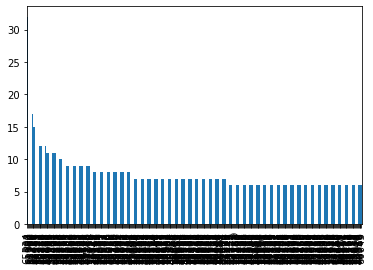

In [24]:
trydf2 = trydf['infected by'].where(trydf.runNo == 1).dropna().value_counts()
trydf2 = trydf2[~(trydf2 <= 5)]
trydf2.plot(kind = 'bar')

In [25]:
trydf1['who'].value_counts()

59825    5
61410    4
58625    4
58192    4
58127    4
        ..
76078    1
72508    1
61607    1
80217    1
84029    1
Name: who, Length: 14132, dtype: int64

### Network plot proberen:

In [29]:
list(data['infected by'].unique())

['323',
 '10310',
 '8605',
 '8596',
 '20918',
 '8590',
 '19075',
 '23588',
 '20914',
 '14427',
 '30912',
 '22511',
 '31849',
 '34098',
 '36852',
 '26233',
 '34104',
 '35947',
 '34944',
 '29807',
 '36699',
 '29441',
 '22517',
 '40567',
 '35954',
 '38219',
 '38091',
 '44513',
 '43280',
 '42826',
 '39476',
 '28543',
 '40267',
 '44519',
 '48370',
 '43281',
 '36870',
 '43132',
 '45136',
 '50308',
 '48859',
 '45452',
 '40601',
 '41758',
 '48850',
 '45935',
 '49433',
 '49724',
 '46540',
 '48384',
 '40272',
 '29814',
 '49874',
 '53474',
 '48857',
 '49012',
 '40558',
 '43751',
 '45460',
 '53777',
 '41764',
 '36707',
 '38093',
 '48998',
 '51554',
 '54062',
 '55081',
 '49053',
 '53467',
 '54069',
 '54638',
 '48860',
 '46253',
 '50750',
 '45476',
 '56579',
 '40583',
 '48529',
 '52739',
 '58286',
 '59284',
 '56007',
 '46260',
 '40260',
 '58585',
 '51540',
 '51582',
 '54058',
 '58444',
 '58434',
 '49888',
 '60708',
 '55924',
 '55975',
 '57132',
 '44689',
 '63798',
 '62116',
 '59139',
 '45465',
 '599

In [31]:
subset = data[['infected by','who',]]
edges = [tuple(x) for x in subset.to_numpy()]
edges

#the number of occurences of an infector:
from collections import Counter
edges2 = Counter(elem[0] for elem in edges)
edges2 = list(edges2.items())
sorted(edges2, key=lambda x: x[1], reverse = True)
# sorted(edges2,key=itemgetter(1))

[('52280', 15),
 ('34098', 12),
 ('63235', 12),
 ('20914', 11),
 ('73992', 11),
 ('66086', 10),
 ('36852', 9),
 ('51540', 9),
 ('72954', 9),
 ('68768', 9),
 ('53474', 8),
 ('49012', 8),
 ('63571', 8),
 ('59574', 8),
 ('62977', 8),
 ('66731', 8),
 ('74713', 8),
 ('78346', 8),
 ('40267', 7),
 ('40272', 7),
 ('41764', 7),
 ('62116', 7),
 ('58918', 7),
 ('68009', 7),
 ('69095', 7),
 ('43280', 6),
 ('39476', 6),
 ('49874', 6),
 ('36707', 6),
 ('54069', 6),
 ('40583', 6),
 ('57267', 6),
 ('53506', 6),
 ('53781', 6),
 ('60995', 6),
 ('59694', 6),
 ('53787', 6),
 ('58442', 6),
 ('60720', 6),
 ('67336', 6),
 ('67763', 6),
 ('46256', 6),
 ('56728', 6),
 ('64362', 6),
 ('49438', 6),
 ('69248', 6),
 ('66822', 6),
 ('71055', 6),
 ('69322', 6),
 ('74506', 6),
 ('69450', 6),
 ('34104', 5),
 ('29807', 5),
 ('42826', 5),
 ('45136', 5),
 ('54058', 5),
 ('59841', 5),
 ('61533', 5),
 ('52742', 5),
 ('56002', 5),
 ('61976', 5),
 ('64484', 5),
 ('50510', 5),
 ('66005', 5),
 ('66943', 5),
 ('48223', 5),
 ('6

In [33]:
# edges2 = list(edges2.items())

out_tup = [i for i in edges2 if i[1] > 1]
out_tup

edges3 = {}
for x, y in edges:
    if x in out_tup:
        edges3[x].append((x,y), inplace = True)
    else: 
        edges3[x] = [(x,y)]
print(edges3)

{'323': [('323', '10310')], '10310': [('10310', '14427')], '8605': [('8605', '19075')], '8596': [('8596', '20914')], '20918': [('20918', '22520')], '8590': [('8590', '31849')], '19075': [('19075', '28551')], '23588': [('23588', '34098')], '20914': [('20914', '52280')], '14427': [('14427', '34104')], '30912': [('30912', '34944')], '22511': [('22511', '36699')], '31849': [('31849', '36870')], '34098': [('34098', '48388')], '36852': [('36852', '49888')], '26233': [('26233', '40275')], '34104': [('34104', '48529')], '35947': [('35947', '42839')], '34944': [('34944', '52742')], '29807': [('29807', '53474')], '36699': [('36699', '45116')], '29441': [('29441', '45136')], '22517': [('22517', '45352')], '40567': [('40567', '58440')], '35954': [('35954', '45452')], '38219': [('38219', '46260')], '38091': [('38091', '57428')], '44513': [('44513', '48860')], '43280': [('43280', '58578')], '42826': [('42826', '61406')], '39476': [('39476', '51540')], '28543': [('28543', '59294')], '40267': [('40267

In [34]:
edges3 = {}
for (x, y) in edges:
    if x in out_tup:
        edges3 = edges3.append(x,y)
edges3
# out_tup

{}

In [35]:
out_tup
edges

[('323', '8596'),
 ('323', '8590'),
 ('323', '8605'),
 ('323', '10310'),
 ('10310', '14417'),
 ('10310', '14421'),
 ('10310', '14427'),
 ('8605', '19075'),
 ('8596', '20918'),
 ('8596', '20914'),
 ('20918', '22511'),
 ('20918', '22517'),
 ('20918', '22520'),
 ('8590', '23588'),
 ('8590', '26233'),
 ('19075', '28543'),
 ('19075', '28550'),
 ('19075', '28551'),
 ('23588', '29441'),
 ('23588', '29444'),
 ('23588', '29449'),
 ('20914', '29807'),
 ('20914', '29814'),
 ('20914', '30912'),
 ('8590', '31849'),
 ('23588', '34098'),
 ('14427', '34104'),
 ('30912', '34942'),
 ('30912', '34944'),
 ('20914', '35954'),
 ('20914', '35947'),
 ('22511', '36707'),
 ('22511', '36699'),
 ('31849', '36870'),
 ('20914', '36852'),
 ('34098', '38076'),
 ('34098', '38091'),
 ('34098', '38093'),
 ('34098', '38219'),
 ('34098', '39476'),
 ('36852', '40260'),
 ('26233', '40261'),
 ('36852', '40272'),
 ('26233', '40275'),
 ('36852', '40267'),
 ('34098', '40567'),
 ('34104', '40583'),
 ('34104', '40558'),
 ('34098'

Nodes of graph: 
['323', '10310', '8605', '8596', '20918', '8590', '19075', '23588', '20914', '14427', '30912', '22511', '31849', '34098', '36852', '26233', '34104', '35947', '34944', '29807', '36699', '29441', '22517', '40567', '35954', '38219', '38091', '44513', '43280', '42826', '39476', '28543', '40267', '44519', '48370', '43281', '36870', '43132', '45136', '50308', '48859', '45452', '40601', '41758', '48850', '45935', '49433', '49724', '46540', '48384', '40272', '29814', '49874', '53474', '48857', '49012', '40558', '43751', '45460', '53777', '41764', '36707', '38093', '48998', '51554', '54062', '55081', '49053', '53467', '54069', '54638', '48860', '46253', '50750', '45476', '56579', '40583', '48529', '52739', '58286', '59284', '56007', '46260', '40260', '58585', '51540', '51582', '54058', '58444', '58434', '49888', '60708', '55924', '55975', '57132', '44689', '63798', '62116', '59139', '45465', '59968', '57267', '54363', nan, '53506', '55690', '55700', '59841', '53781', '59575', '

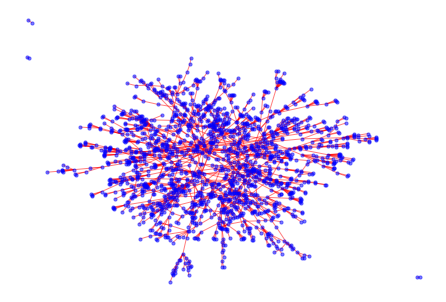

In [39]:
G=nx.Graph()
pos = nx.spring_layout(G, k = 0.5)
# G.add_node("a")
G.add_nodes_from(data['infected by']) #["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])


print("Nodes of graph: ")
print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

nx.draw(G, width = 1, node_color = 'b', node_size = 10,  alpha = 0.5, edge_color = 'red')

plt.show()


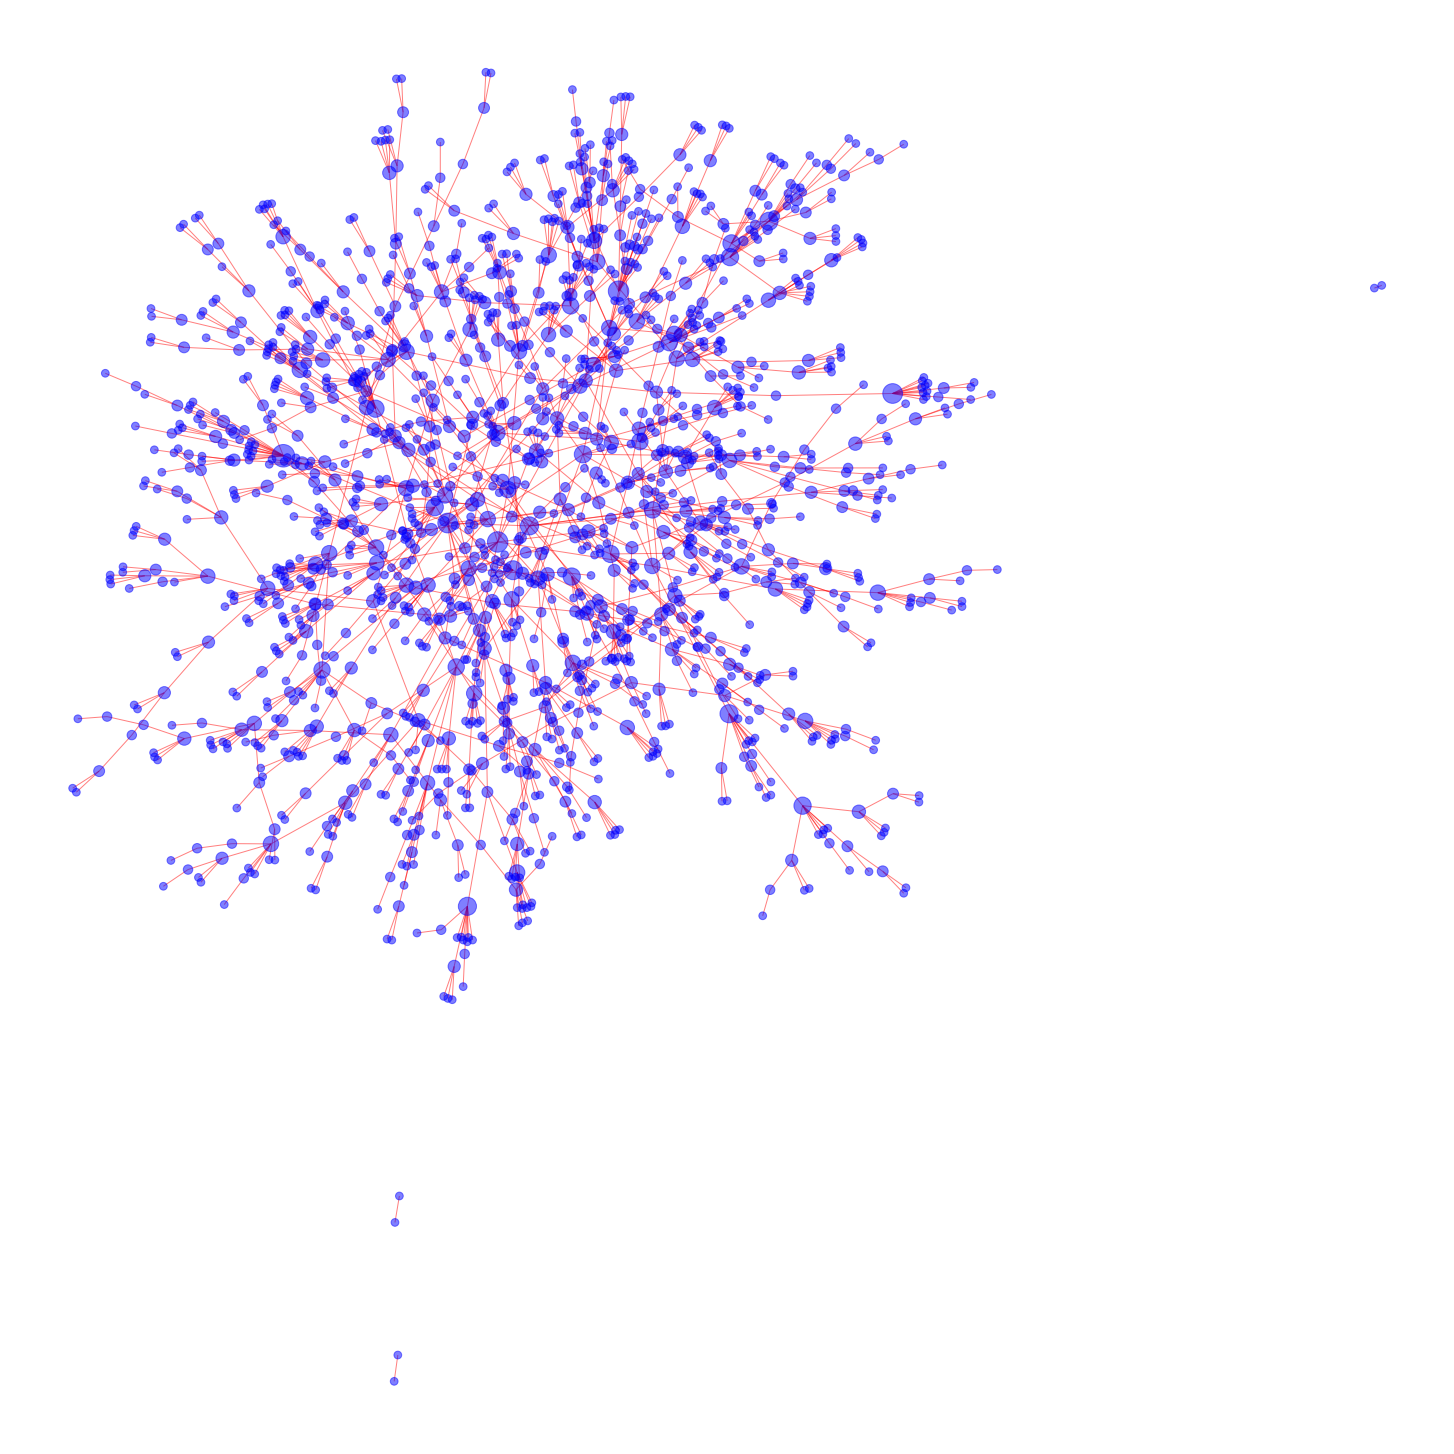

In [40]:
G=nx.Graph()
pos = nx.spring_layout(G)
# G.add_node("a")
G.add_nodes_from(data['infected by']) #["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])


# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


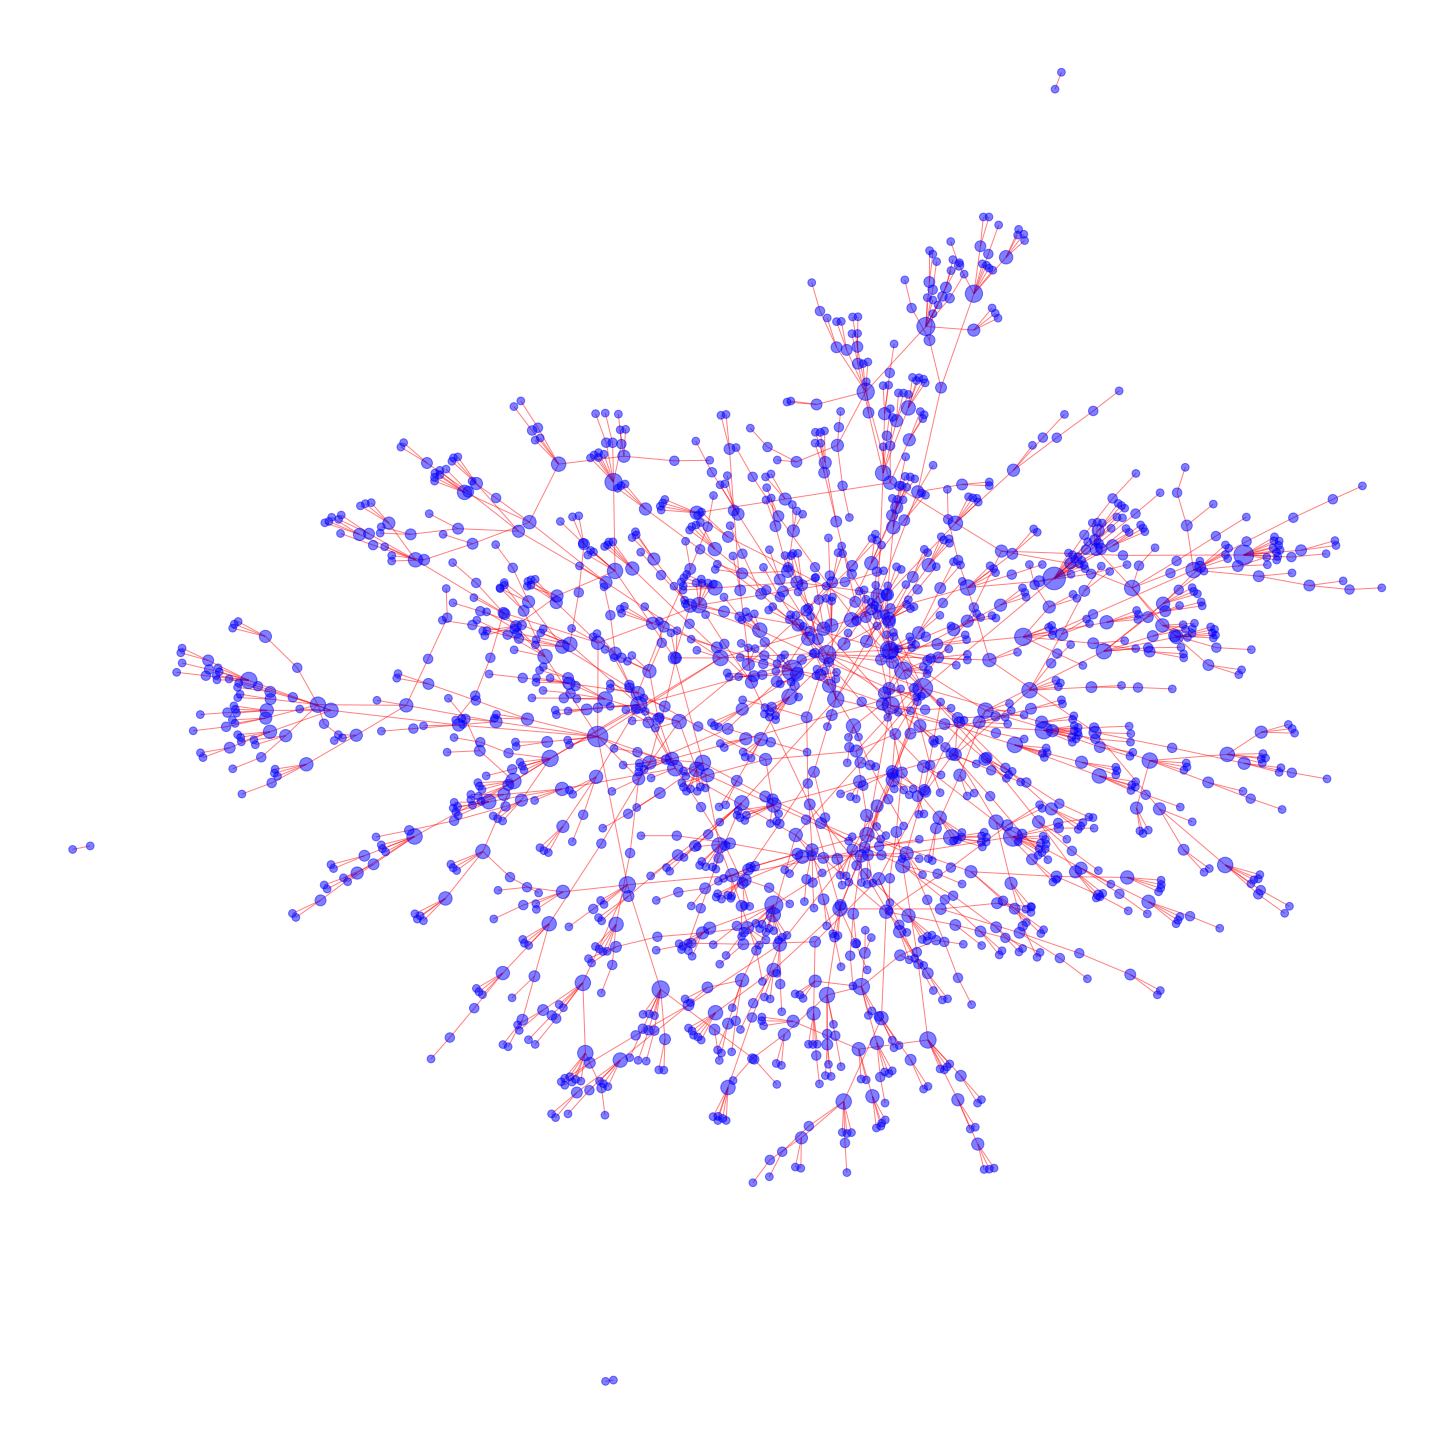

In [41]:
G=nx.Graph()
pos = nx.spring_layout(G, k = 0.3)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


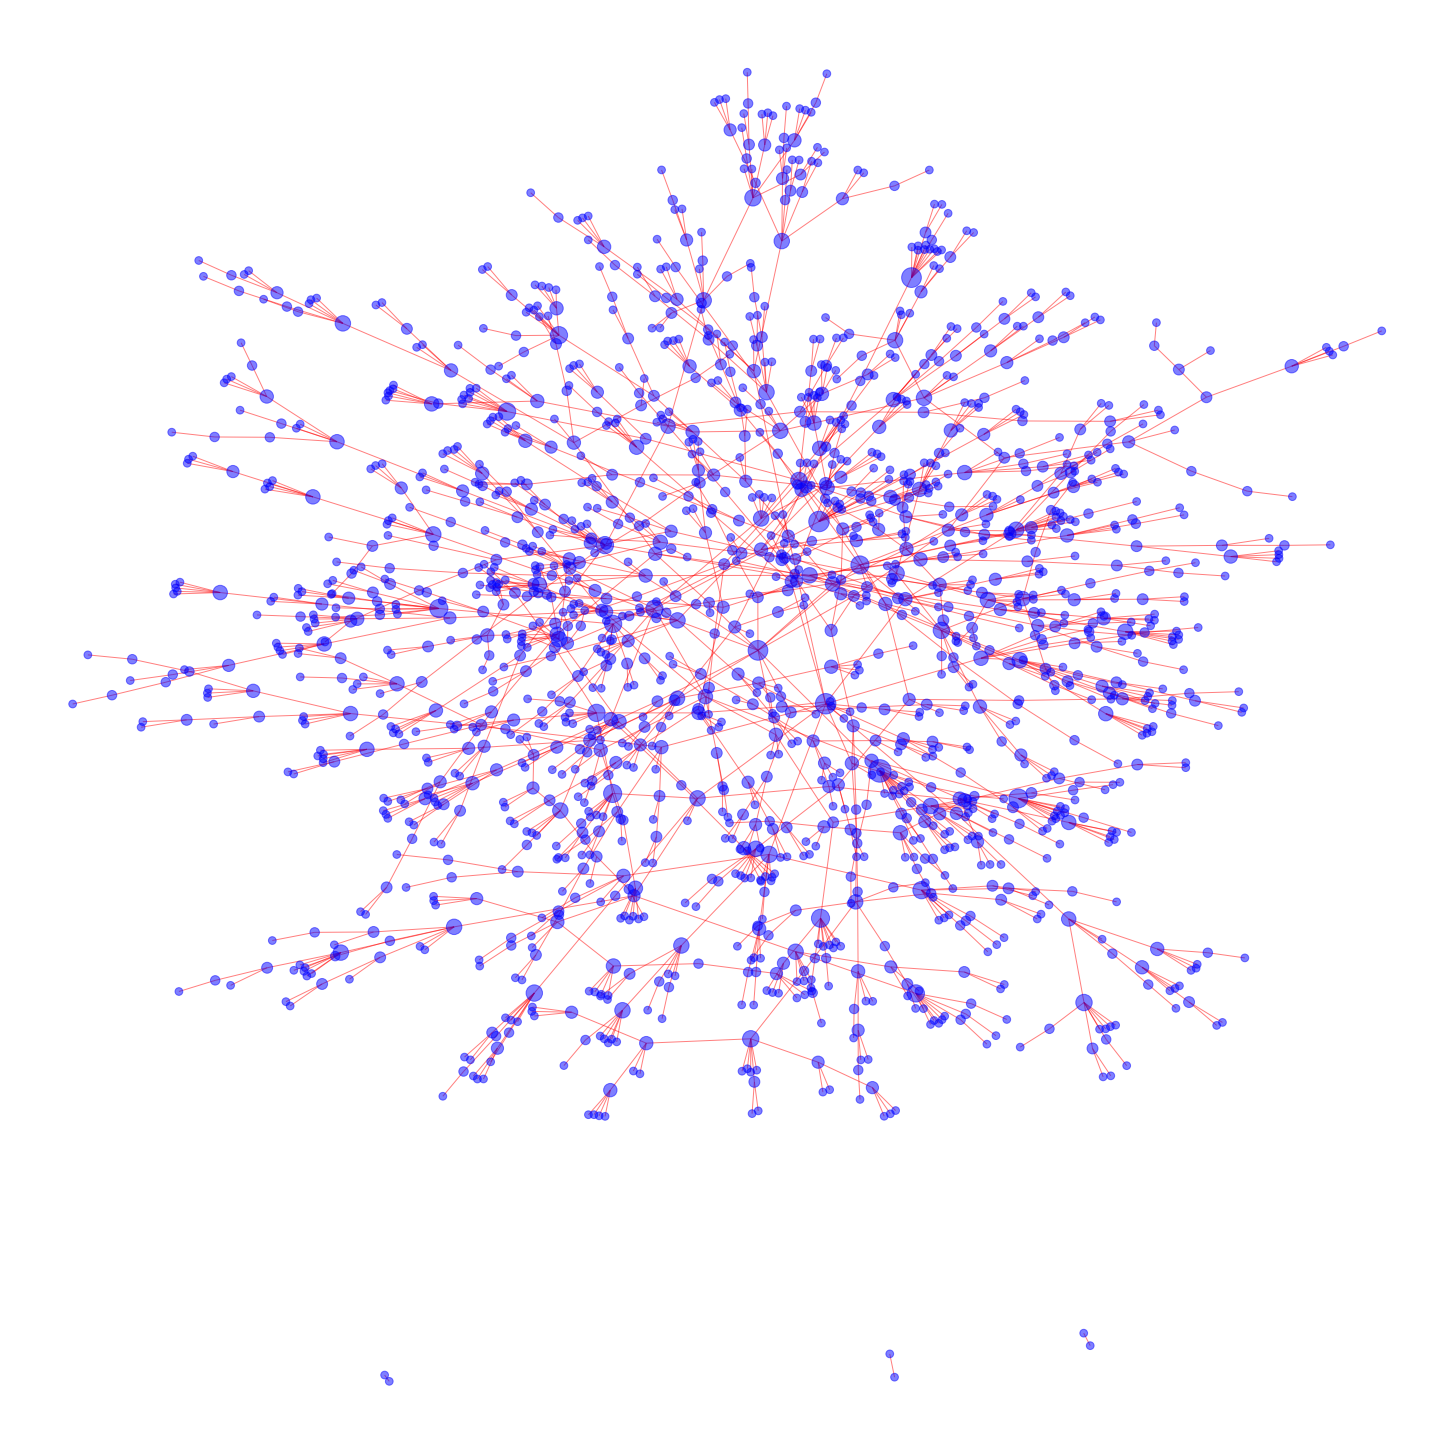

In [42]:
#Shell layout
G=nx.Graph()
pos = nx.shell_layout(G)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


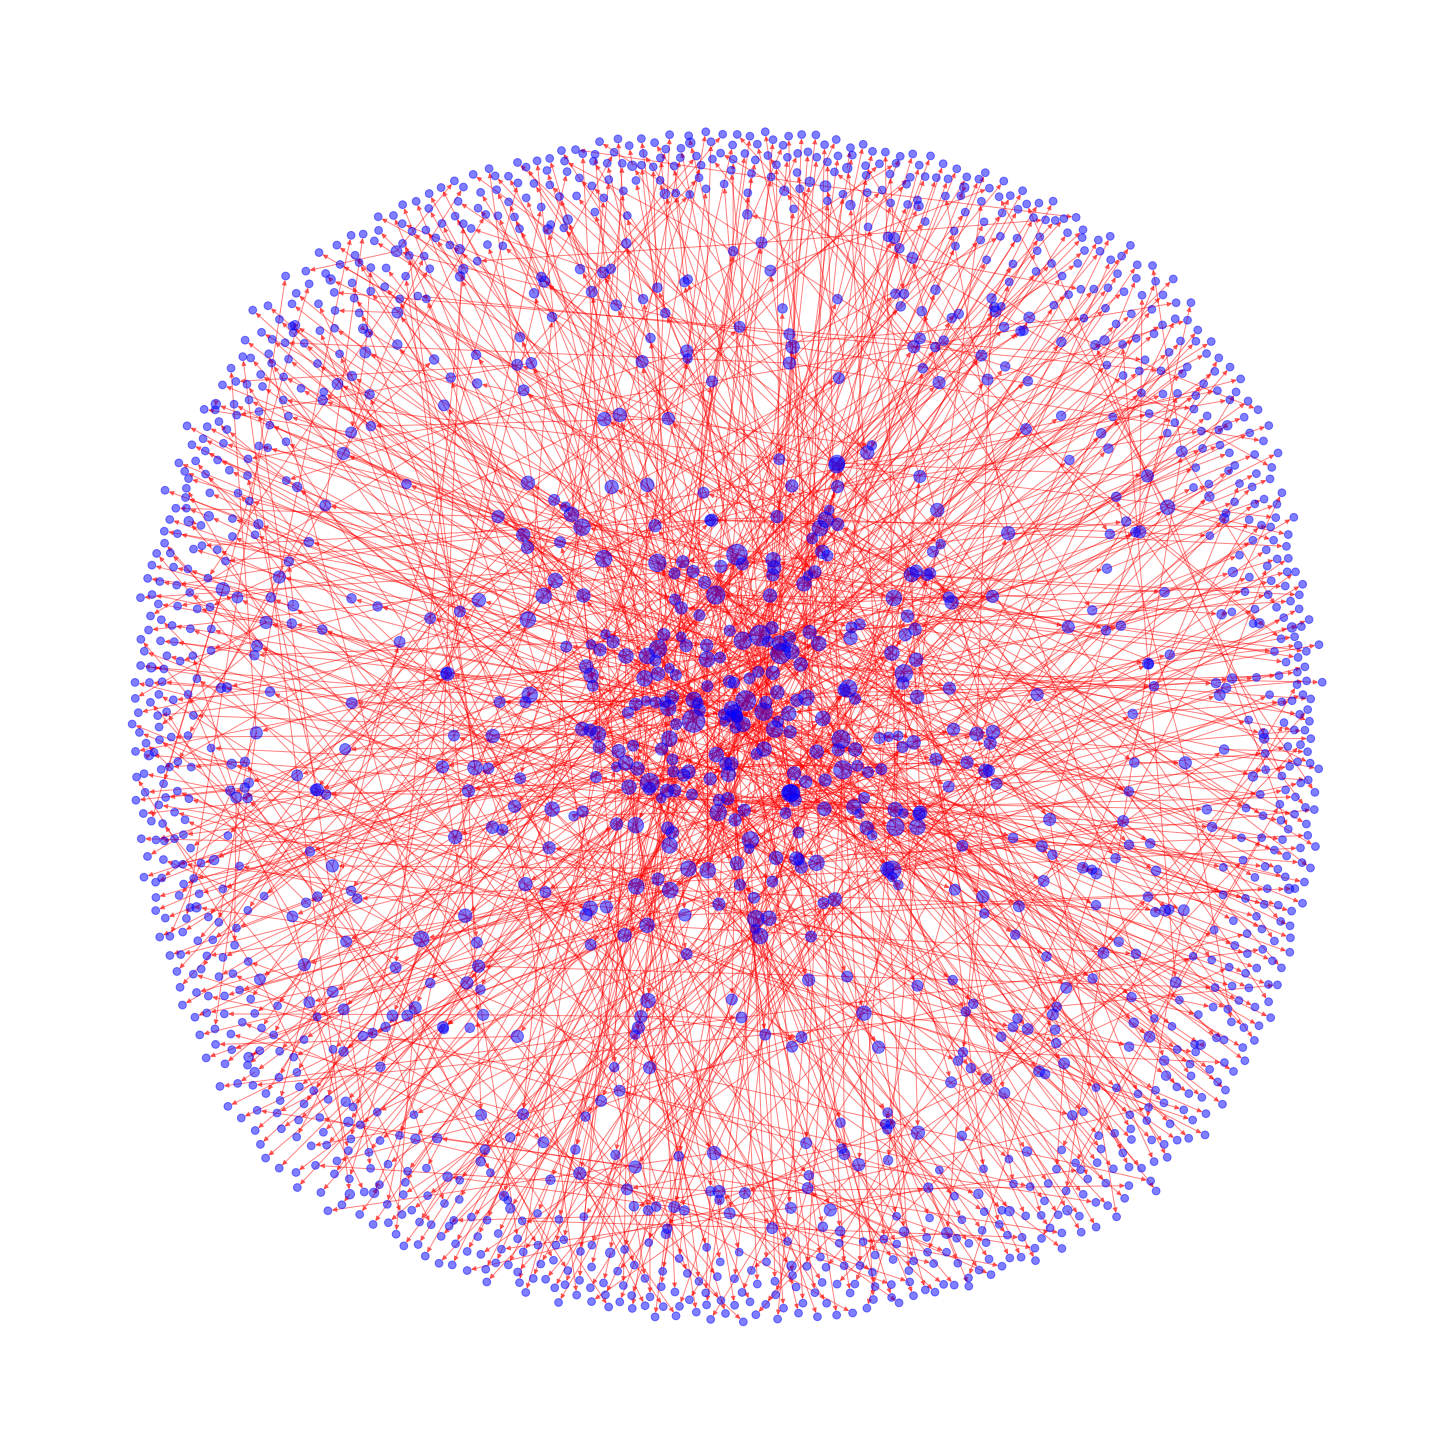

In [43]:
# Directed graph (starts from 1 point)
G=nx.DiGraph()
pos = nx.spring_layout(G, k = 0.5)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


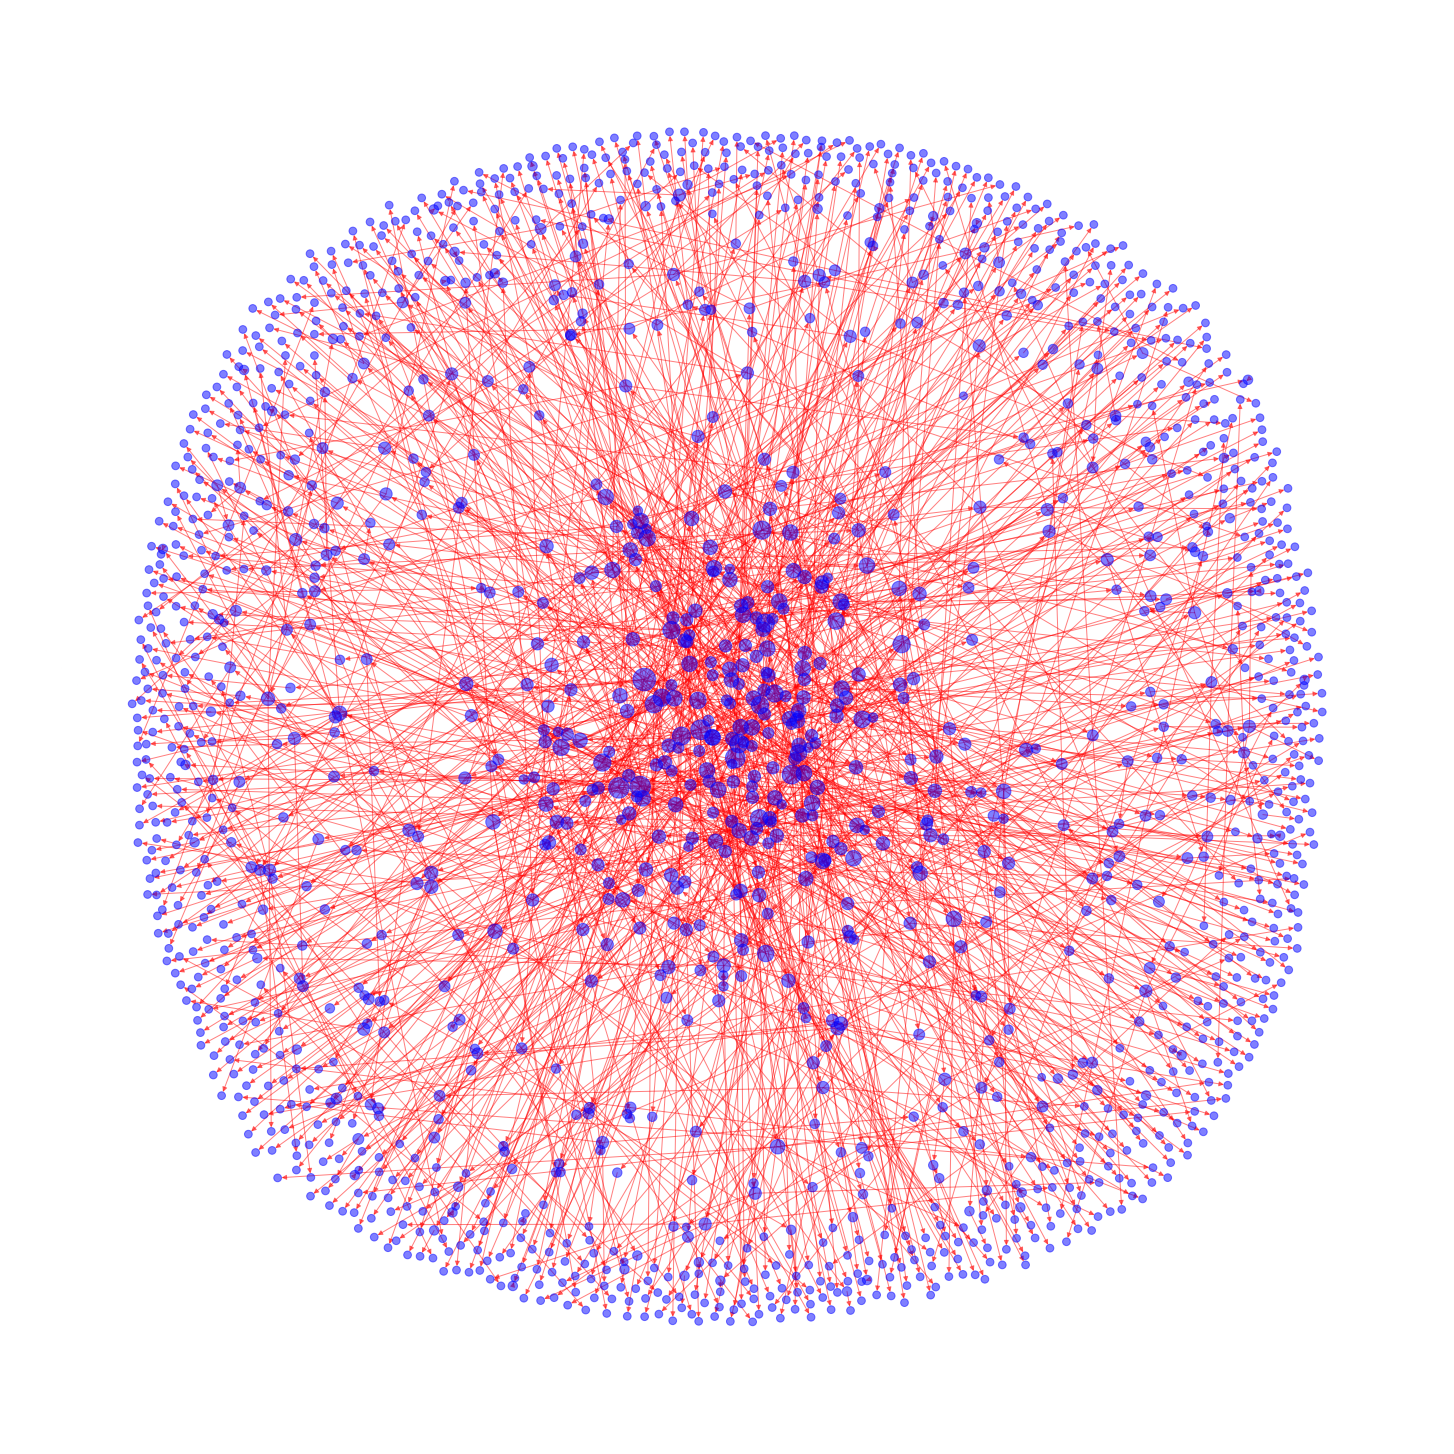

In [44]:
# Directed graph (starts from 1 point), with shell_layout
G=nx.DiGraph()
pos = nx.shell_layout(G)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

G.remove_nodes_from(nx.isolates(G)) # removes isolated edges (shouldn't exist).


d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


**To do: remove all edges that are the only ones outgoing from a single node (1:1 infections)**

Also: can we simulate this graph over time?

Perhaps take a look at:
- https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial